**Data Analysis and Hypothesis Testing of Chicago Taxi Trips**

**CONTENT** <a id='back'></a>

* [1. Introduction](#intro)
* [2. Initialisation](#ini)
* [3. Upload Data](#uploaddata)
  * [3.1 Preparing Data](#uploaddata1)
* [4. Exploratory Data Analysis](#eda)
  * [3.1 Exploring ´company_base´ data](#eda1)
  * [3.2 Exploring ´trips_base´ data](#eda2)
  * [3.3 Exploring ´weather_base´ data](#eda3)
* [5. Data Preprocesing](#preprocesing)
* [6. Analysing Data and Visualization](#analysis)
* [7. Testing Statistical Hypothesis](#test)
* [8. General Conclusion](#end)

# Introduction <a id='intro'></a>

In this assignment we will conduct data analysis and hypothesis testing. 
We will begin by exploring and visualising data for taxi companies and neighbourhoods in Chicago. We will then investigate whether average trip lengths from the Loop to O'Hare International Airport change on rainy Saturdays. This will allow us to draw conclusions based on the data and explain the results.

# Initialisation <a id='ini'></a>

In [2]:
# Cargar todas las librerías
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Upload Data <a id='uploaddata'></a>

In [5]:
# Uploading data file from different databases
try: 
    company_base = pd.read_csv('moved_project_sql_result_01.csv')
    trips_base = pd.read_csv('moved_project_sql_result_04.csv')
    weather_base = pd.read_csv('moved_project_sql_result_07.csv')
except:
    company_base = pd.read_csv('/datasets/moved_project_sql_result_01.csv')
    trips_base = pd.read_csv('/datasets/moved_project_sql_result_04.csv')
    weather_base = pd.read_csv('/datasets/moved_project_sql_result_07.csv')

## Preparing Data

Next, we will proceed to load the tables associated with the companies and travel data. Subsequently, we will correct and enrich the data if necessary.

In [7]:
company_base # Load the data file of the dataframe company_base

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [8]:
trips_base # Load the data file of the dataframe trips_base

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [9]:
weather_base # Load the data file of the dataframe weather_base

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


# Exploratory Data Analysis (EDA) <a id='eda'><a>

## Exploring company_base data <a id='eda1'></a>

The company_base dataset contains:

- `company_name`: Taxis company name
- `trips_amount`: The number of trips by each taxi company on November 15 and 16, 2017.

In [6]:
company_base.info() # Checking the general information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [10]:
company_base.describe() # Verifying the details of each variable

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [8]:
#Verificamos duplicidad
duplicados = company_base.duplicated()
cantidad_duplicados = duplicados.sum()
cantidad_duplicados # Finalmente, comprobamos el número de filas duplicadas de 'company_base'

0

At a glance with the above information, we can previously observe that:

- There are a total of 64 rows.
- There are no variables with missing values.
- There are no anomalous data regarding the minimum or maximum number of trips, nor in the type of data for each variable. There is also no duplication of data.

Therefore, no modifications are required.

## Exploring trips_base data <a id='eda2'></a>

The company_base dataset contains:

- `dropoff_location_name`: Chicago neighbourhoods where trips ended.
- `average_trips`: the average number of trips that ended in each neighbourhood in November 2017.

In [9]:
trips_base.info() # Checking the general information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [11]:
trips_base.describe() # Verifying the details of each variable

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [12]:
#Duplicity checking
duplicados1 = trips_base.duplicated()
cantidad_duplicados1 = duplicados1.sum()
print(cantidad_duplicados1) 

0


At a glance with the above information, we can previously observe that:

- There are a total of 93 rows.
- There are no variables with missing values.
- There are no anomalous data regarding the minimum or maximum number of trips for each company, nor in the type of data for each variable. There is also no duplication of data.

Therefore, no modifications are required.


## Exploring weather_base data <a id='eda3'></a>

The dataset contains the following variables:

- `start_ts`: date and time of the collection
- `weather_conditions`: weather conditions at the time when the trip started
- `duration_seconds`: duration of the trip in seconds

Note: This dataset contains data on trips from the Loop to O'Hare International Airport. 

In [13]:
weather_base.info() # Checking the general information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 16.8+ KB


In [14]:
weather_base.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [14]:
#Verificamos duplicidad
duplicados2 = weather_base.duplicated()
cantidad_duplicados2 = duplicados2.sum()
cantidad_duplicados2 # Finalmente, comprobamos el número de filas duplicadas de 'trips_base'

197

In [15]:
weather_base[weather_base.duplicated()] #Revisamos la muestra de duplicados

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


According to the nature of the data, it is possible to have the same start date and weather conditions but different durations, as one company may take longer or shorter than another. Therefore, those variables will not be removed.

In [16]:
weather_base['weather_conditions'].unique() #Validating unique values

array(['Good', 'Bad'], dtype=object)

In [17]:
weather_base['start_ts'].unique() #Validating unique values

array(['2017-11-25 16:00:00', '2017-11-25 14:00:00',
       '2017-11-25 12:00:00', '2017-11-04 10:00:00',
       '2017-11-11 07:00:00', '2017-11-11 04:00:00',
       '2017-11-04 16:00:00', '2017-11-18 11:00:00',
       '2017-11-11 14:00:00', '2017-11-11 12:00:00',
       '2017-11-18 06:00:00', '2017-11-04 11:00:00',
       '2017-11-11 08:00:00', '2017-11-04 08:00:00',
       '2017-11-11 16:00:00', '2017-11-25 13:00:00',
       '2017-11-04 12:00:00', '2017-11-25 10:00:00',
       '2017-11-11 13:00:00', '2017-11-18 14:00:00',
       '2017-11-04 14:00:00', '2017-11-25 20:00:00',
       '2017-11-11 11:00:00', '2017-11-18 12:00:00',
       '2017-11-11 10:00:00', '2017-11-04 17:00:00',
       '2017-11-11 09:00:00', '2017-11-04 06:00:00',
       '2017-11-04 05:00:00', '2017-11-11 19:00:00',
       '2017-11-04 13:00:00', '2017-11-04 07:00:00',
       '2017-11-11 06:00:00', '2017-11-04 09:00:00',
       '2017-11-11 05:00:00', '2017-11-18 10:00:00',
       '2017-11-25 05:00:00', '2017-11-25 08:0

At a glance with the above information, we can previously observe that:

- There are a total of 1068 rows.
- There are no variables that have missing values.
- No anomalous data is seen with respect to dates, weather description or duration in seconds. The date data type does need to be changed, as it is defined as ‘object’ and we can see that there are 197 duplicates.

Therefore, it requires modification.

# Data Preprocesing <a id='preprocesing'></a>

We proceed to correct the data of 'weather_base' as previously analysed.

In [18]:
#Changing the date format
weather_base['start_ts'] = pd.to_datetime(weather_base['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [19]:
#Proceding to delate all the duplicated rows in their 3 variables
weather_base = weather_base.drop_duplicates(subset=['start_ts', 'weather_conditions', 'duration_seconds'])

In [21]:
print(weather_base.duplicated().sum()) #Validating the duplicates number

0


In [22]:
weather_base.info() # Verifying the changes

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.8+ KB


# Analysing Data and Visualization <a id='analysis'></a>

We proceed to identify the top 10 neighbourhoods in terms of route completion and graph them.

In [23]:
#We identified the top 10 neighbourhoods with respect to average journey completion.
top10_barrios_viajes = trips_base.sort_values(by='average_trips', ascending=False).head(10)

In [24]:
#Showing the created table
top10_barrios_viajes

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


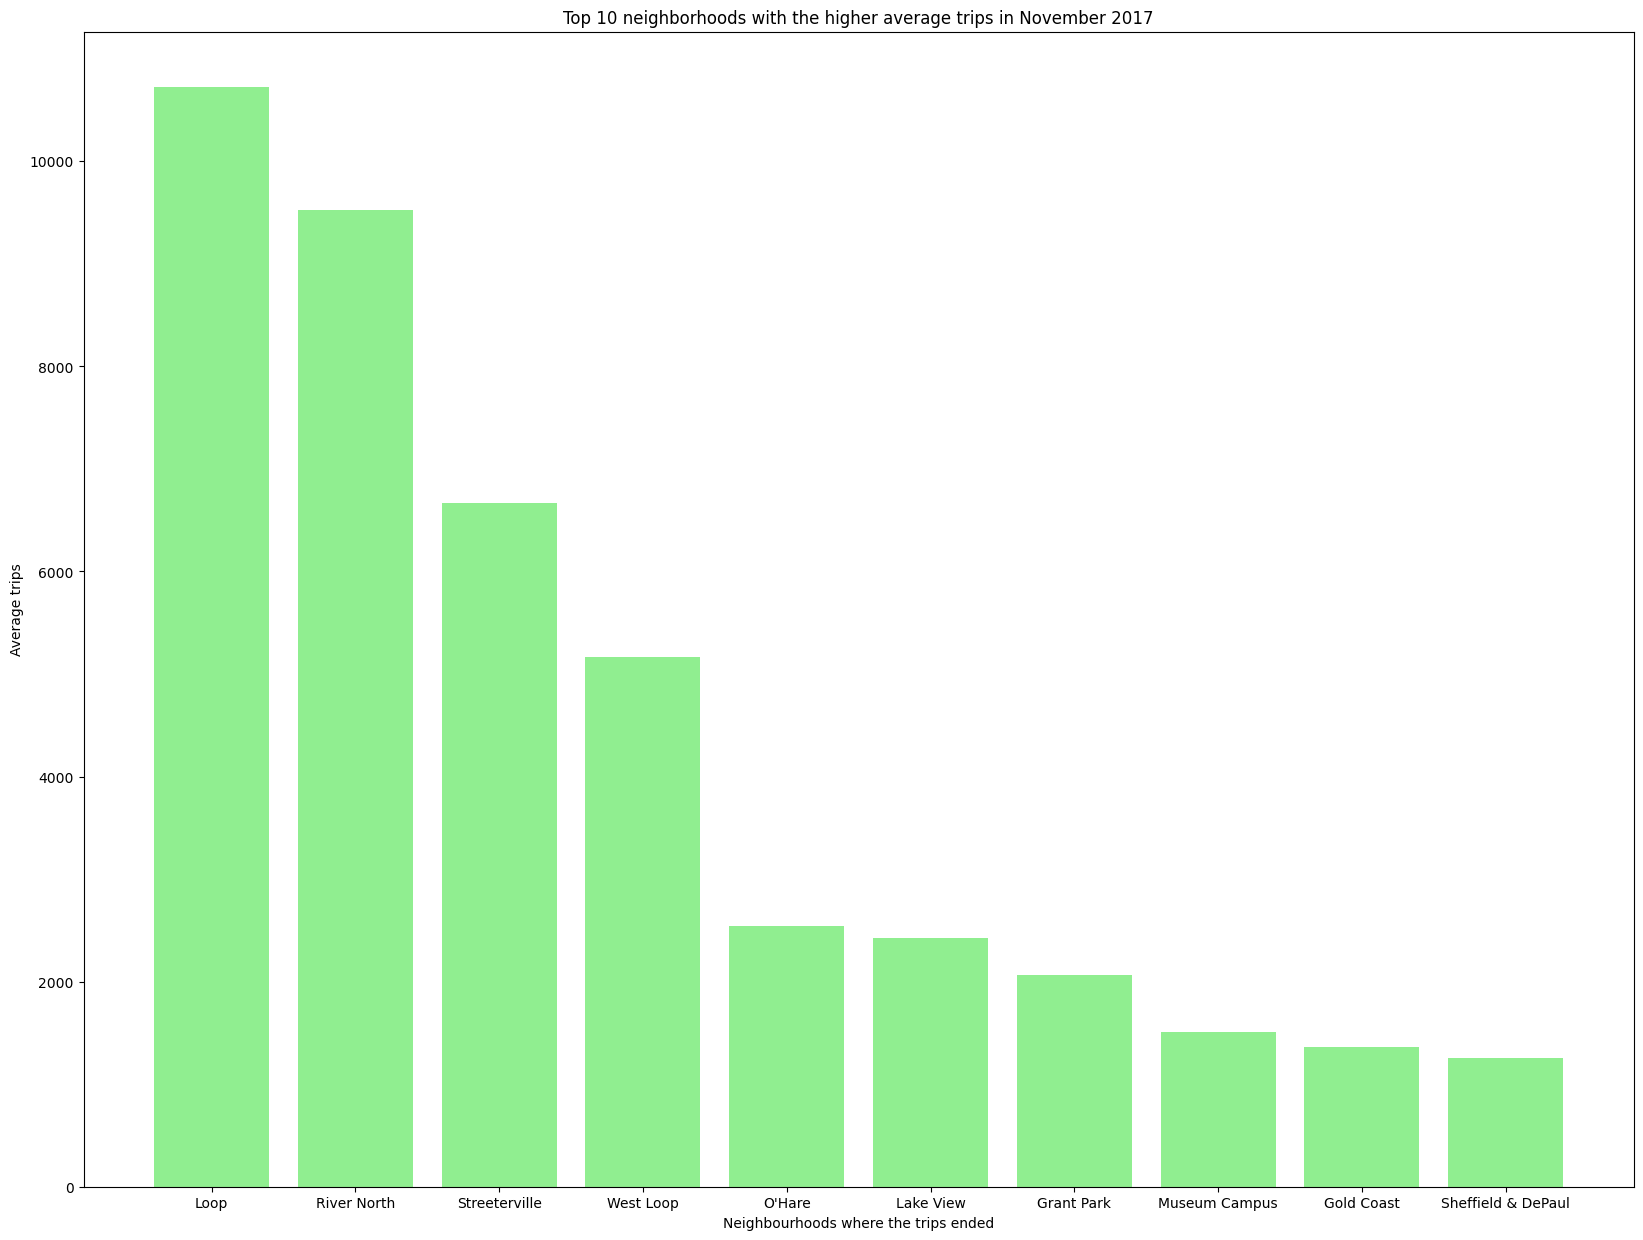

In [25]:
# We plotted the top 10 neighborhoods with the highest average number of trips.
plt.figure(figsize=(20, 15))
plt.bar(top10_barrios_viajes['dropoff_location_name'], top10_barrios_viajes['average_trips'], color='Lightgreen')
plt.title('Top 10 neighborhoods with the higher average trips in November 2017')
plt.xlabel('Neighbourhoods where the trips ended')
plt.ylabel('Average trips')
plt.show()

We analysed the taxi companies and the number of trips taken using a bar chart.

In [26]:
# We calculated the top 10 companies with the highest number of trips.
company_10 = company_base.head(10)

In [29]:
# We grouped the ‘other companies’ that are not part of the top10 in a new row.
otros = pd.DataFrame({
    'company_name': ['Otras Compañías'],
    'trips_amount': [company_base.iloc[10:]['trips_amount'].sum()]
})

In [30]:
# We combined the top 10 companies and "Other Companies" 
final_data_company = pd.concat([company_10, otros])

In [31]:
#Showing the created table
final_data_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


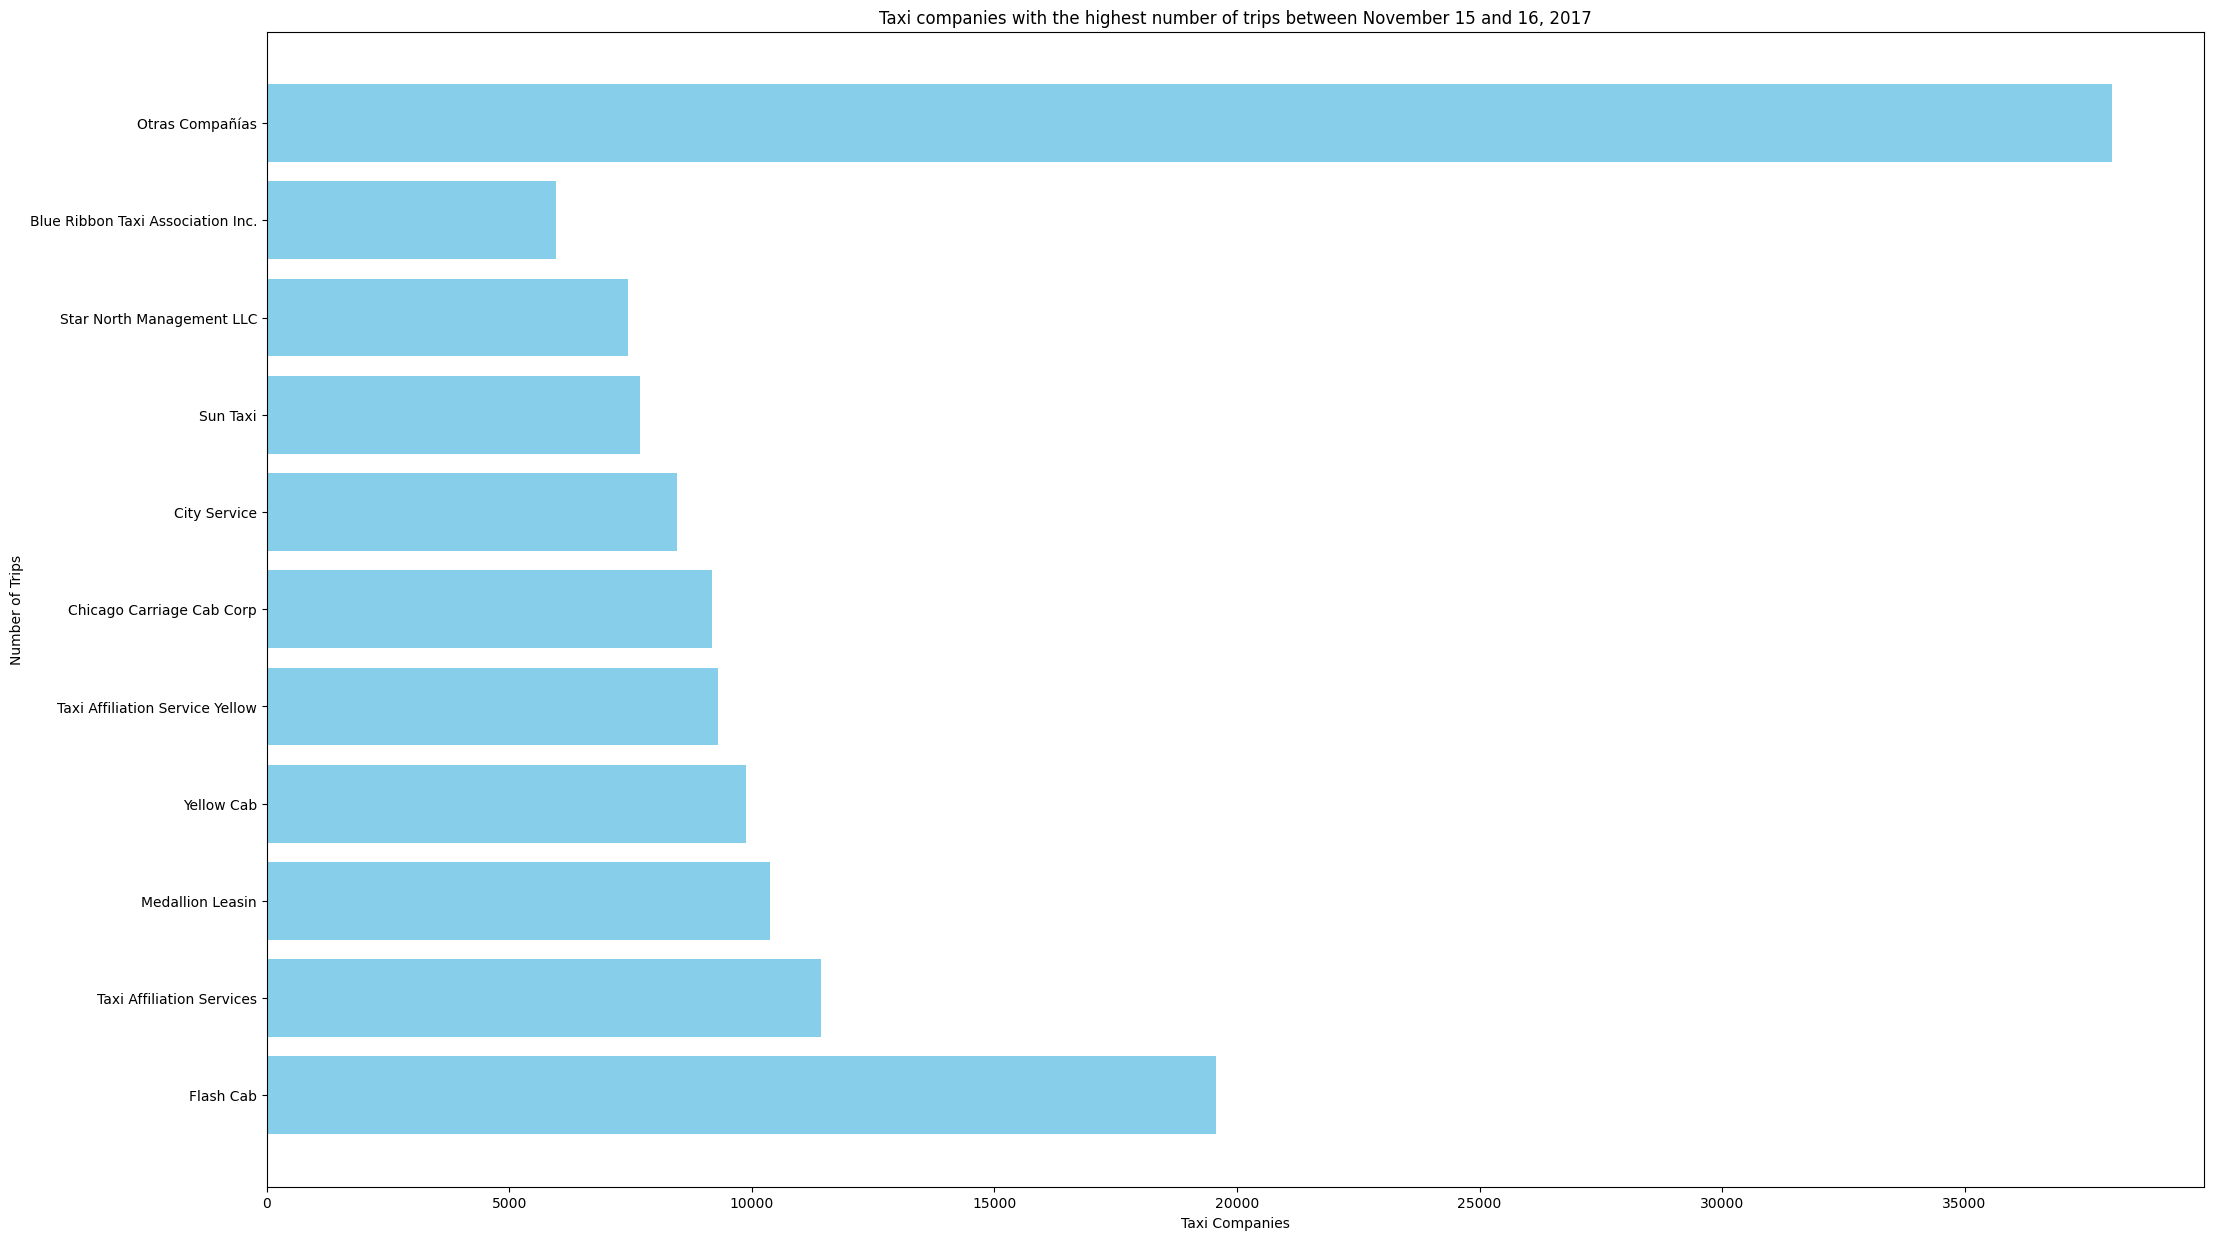

In [32]:
#We plotted taxi companies against the number of trips.
plt.figure(figsize=(25, 15))
plt.barh(final_data_company['company_name'], final_data_company['trips_amount'], color='skyblue')
plt.title('Taxi companies with the highest number of trips between November 15 and 16, 2017')
plt.xlabel('Taxi Companies')
plt.ylabel('Number of Trips')
plt.show()

**CONCLUSIONS**:

From this first analysis we can conclude the following:

    a) Regarding the neighbourhoods with the highest average trips, we can observe that ‘Loop’, River North' and “Streeterville” are the Top 3, with trips above 6000 on average during the month of November 2017.

    b) Regarding the taxi companies with the highest number of trips are: ‘Flash Cab’, ‘Taxi Affiliation Services’ and ‘Medallion Leasing’, which exceeded 10,000 trips between 15 and 16 November 2017. While the companies that were grouped outside of the top 10 total more than 35,000 trips, they represent almost the same value as the top 3 aggregates alone.

# Testing Statistical Hypothesis <a id='test'></a>

Next, we will proceed to corroborate the following hypothesis:

The average travel time from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [33]:
#First, we filter the DataFrame for this exercise.
#We filter Saturdays.

saturdays = weather_base[weather_base['start_ts'].dt.dayofweek == 5]

# We filter trips on rainy Saturdays
saturdays_rainy = saturdays[saturdays['weather_conditions'] == 'Bad']

# We filter trips on non-rainy Saturdays
saturdays_no_rain = saturdays[saturdays['weather_conditions'] == 'Good']

In [34]:
# Second, we proceed to calculate the average duration:

# Average duration of trips on rainy Saturdays.
avg_duration_rainy_saturdays = saturdays_rainy['duration_seconds'].mean()

# Average duration of trips on non-rainy Saturdays
avg_duration_no_rain_saturdays = saturdays_no_rain['duration_seconds'].mean()

Next, we will analyse the behaviour of the travel duration data for both groups (rainy / non-rainy) to see if we could use a t-student sample in case of having a normal distribution.

In [35]:
# We filter by 'Good' (not rainy) and 'Bad' (rainy)
clima = ['Good', 'Bad']

# We achieved a filtered dataframe
filtro_clima = saturdays[saturdays['weather_conditions'].isin(clima)]
filtro_clima['weather_conditions'].unique()#verifying the filter


array(['Good', 'Bad'], dtype=object)

In [36]:
# Function to compare histograms 
def comparar_histogramas(data1, data2, name1, name2, descrip, descrip2):
    plt.figure(figsize=(18, 5))
    
    # Histogram of the first DataFrame (data1)
    plt.subplot(1, 2, 1)
    plt.hist(data1, bins=10, label=name1, color='blue', alpha=0.7)
    plt.title(f'{descrip}')
    plt.xlabel(f'{descrip2}')
    plt.legend()

    # Histogram of the second DataFrame (data2)
    plt.subplot(1, 2, 2)
    plt.hist(data2, bins=10, label=name2, color='green', alpha=0.7)
    plt.title(f'{descrip}')
    plt.xlabel(f'{descrip2}')
    plt.legend()

In [37]:
# We create filters for both groups to plot histograms.
lluvioso = filtro_clima[filtro_clima['weather_conditions'] == 'Bad']
No_lluvioso = filtro_clima[filtro_clima['weather_conditions'] == 'Good']

In [39]:
# We calculate the variances to see the dispersion of the samples 
var_lluvioso = lluvioso['duration_seconds'].var()
print(var_lluvioso)

564819.443463872


In [40]:
# We calculate the variances to see the dispersion of the samples 
var_no_lluvioso = No_lluvioso['duration_seconds'].var()
print(var_no_lluvioso)

598216.951081022


In [41]:
#Rule of Thumb to Verify Variance Relationship 
regla = var_no_lluvioso / var_lluvioso
print(regla)

1.0591295289204865


From the rule of thumb we can conclude that the ratio between the largest and the smallest variance gives a value less than 4 (<4) which is an indication that there is no substantial difference between the two variances. We will now proceed to view the variances graphically through boxplots.

In [42]:
# We define a function for box plots and to visualise the variability of the samples 
def plot_boxplot(data1, data2, ylim=None,title=None):
    
    plt.figure(figsize=(16, 5))
    
    # Creating the first boxplot graph
    plt.subplot(1, 2, 1)
    plt.boxplot(data1)
    if ylim is not None:
        plt.ylim(ylim)
    if title is not None:
        plt.title(title[0])

    # Creating the second boxplot graph
    plt.subplot(1, 2, 2)
    plt.boxplot(data2)
    if ylim is not None:
        plt.ylim(ylim)
    if title is not None:
        plt.title(title[1])
        
    # Adjusting the desing of the subplots
    plt.tight_layout()
    plt.show

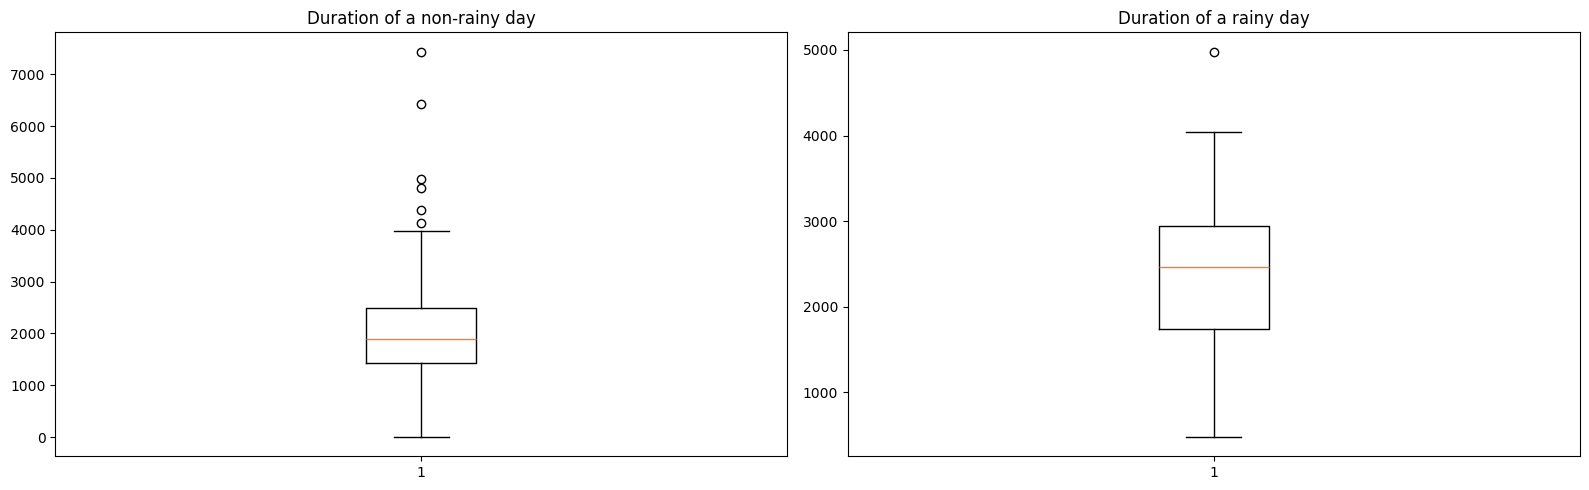

In [43]:
plot_boxplot(No_lluvioso['duration_seconds'],lluvioso['duration_seconds'],title=['Duration of a non-rainy day', 'Duration of a rainy day'])

We can graphically observe that there is no significant difference between the variances of both groups, as the boxplots display symmetry despite the whiskers being approximately 1000 in length and the presence of a few outliers. Consequently, combined with the fact that the rule of thumb (<4) is met, homoscedasticity can be assumed in these samples for the purposes of applying the Student's t-test for statistical analysis.

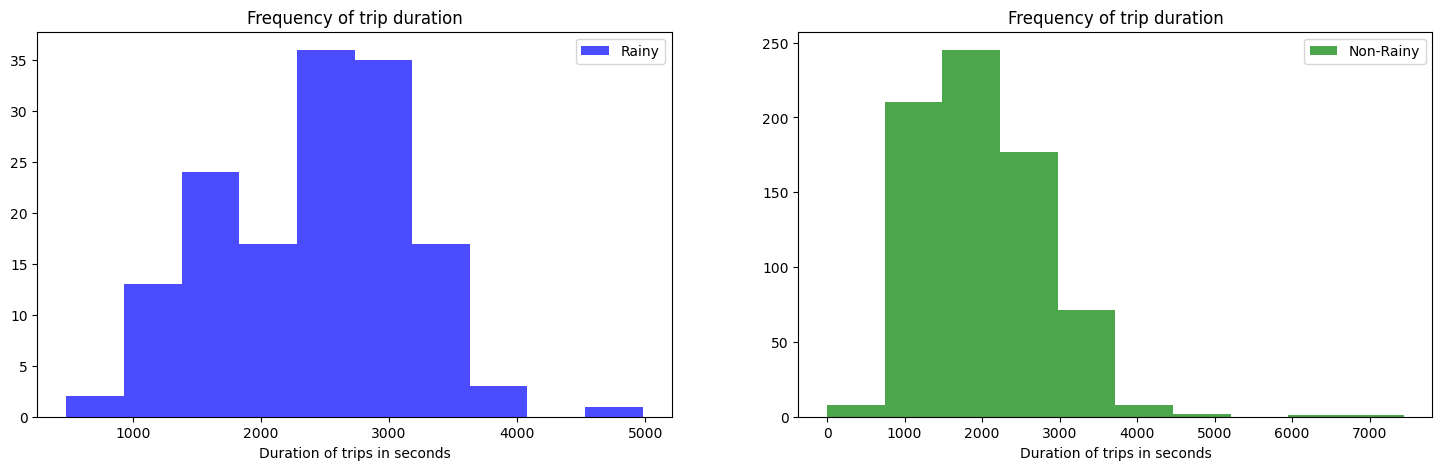

In [44]:
# We call the histogram function to see if there is a normal distribution for the statistical test. 
comparar_histogramas(lluvioso['duration_seconds'], No_lluvioso['duration_seconds'], 'Rainy' , 'Non-Rainy' ,'Frequency of trip duration','Duration of trips in seconds')

We can observe that both groups have a tendency to a normal distribution, however the sample data are >30 (large sample) so the t-test, which is the one we will use, is less sensitive to deviations from normality.

To test whether the difference in average trip length between rainy Saturdays and non-rainy Saturdays is statistically significant, a two independent samples t-test can be used, since we are comparing the means of two different groups.

First, we set up our hypotheses:

- Null hypothesis (H0): The average trip lengths between rainy and non-rainy Saturdays are the same.
- Alternative hypothesis (H1): The average trip lengths between rainy and non-rainy Saturdays are different.

In [45]:
# Perform a two-sample t-test
results = st.ttest_ind(saturdays_rainy['duration_seconds'], saturdays_no_rain['duration_seconds'])

# Set a significance level (alpha)
alfa = 0.05

print(results.pvalue)

if results.pvalue < alfa:
    print("We reject the null hypothesis: Average trip length changes on rainy Saturdays.")
else:
    print("We do not reject the null hypothesis: There is insufficient evidence that average trip length changes on rainy Saturdays.")

7.397770692813658e-08
We reject the null hypothesis: Average trip length changes on rainy Saturdays.


## General Conclusion <a id='end'></a>

As a general conclusion, the following steps undertaken in this project can be highlighted:

Step 1: The integrity of the three datasets was verified.

Step 2: Each variable in the datasets was analyzed for anomalies to correct them (whether due to text standardization issues, outlier data, or data that did not make sense given the nature of the variable). In addition, duplicate data were checked. This was done for each of the tables, where only the 'weather_base' table had duplicates and data type inconsistencies in the date column that needed correction.

Step 3: The missing values of each variable were checked, and it was concluded that there were no cases of missing data in the three tables.

Step 4: The date variable was corrected to be converted into the 'datetime64' format, and duplicate rows were removed.

Step 5: The first data analysis was carried out, including the 'company_base' and 'trips_base' datasets, from which the following conclusions were drawn:

    a) Regarding the neighborhoods with the highest average number of trips, 'Loop', 'River North', and 'Streeterville' lead with more than 6,000 trips on average during November 2017.

    b) Regarding the taxi companies with the highest number of trips, 'Flash Cab', 'Taxi Affiliation Services', and 'Medallion Leasing' exceeded 10,000 trips between November 15 and 16, 2017. Although there are many other companies beyond the top 10, their contribution to the total number of trips is similar to that of the top three.

Step 6: A hypothesis test was conducted on the 'weather_base' dataset, which corroborated the null hypothesis:
      
   - H0: The average trip duration between rainy and non-rainy Saturdays is equal.

   - Note: This is under the assumption that the data tend to follow a normal distribution and that the samples include more than 30 data points.